# *Load dataset from kaggle*

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

In [2]:
api_token = {"username":"mpyahyazadeh","key":"e7185a8edfd31216e4aa7f59e82701cb"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

Dataset URL: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
License(s): CC0-1.0


In [4]:
!unzip /content/real-or-fake-fake-jobposting-prediction.zip -d data

Archive:  /content/real-or-fake-fake-jobposting-prediction.zip
  inflating: data/fake_job_postings.csv  


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential

In [6]:
import pandas as pd

In [7]:
job = pd.read_csv("/content/data/fake_job_postings.csv")

In [8]:
job

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [9]:
job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# *Cleaning Data* and visualization

In [10]:
job["fraudulent"].unique()

array([0, 1])

In [11]:
job.shape

(17880, 18)

In [12]:
import seaborn as sns

<Axes: xlabel='fraudulent', ylabel='count'>

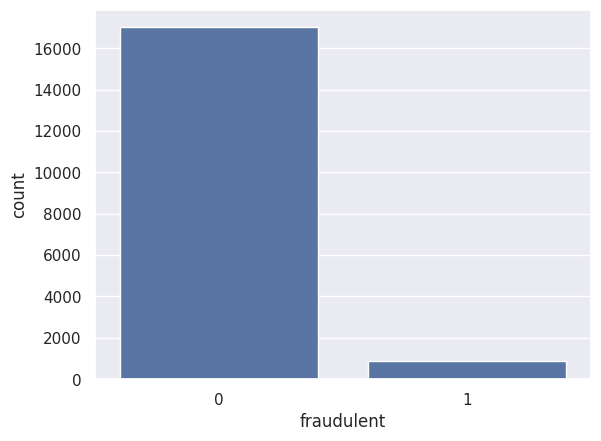

In [13]:
sns.set(style="darkgrid")
sns.countplot(x = "fraudulent" , data = job)

In [14]:
print(job.isnull().sum())
print(job.duplicated().sum())
print(job.info())
print(job.describe())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   compan

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
del job['salary_range'] # it has too much null values
del job['job_id'] # its not essentional

In [17]:
job.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
job.fillna(" ",inplace = True)

In [19]:
job.shape

(17880, 16)

In [20]:
job['text'] = job['title'] + ' ' + job['location'] + ' ' + job['department'] + ' ' + job['company_profile'] + ' ' + job['description'] + ' ' + job['requirements'] + ' ' + job['benefits'] + ' ' + job['employment_type'] + ' ' + job['required_education'] + ' ' + job['industry'] + ' ' + job['function']

In [21]:
job.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [22]:
del job['title']
del job['location']
del job['department']
del job['company_profile']
del job['description']
del job['requirements']
del job['benefits']
del job['employment_type']
del job['required_experience']
del job['required_education']
del job['industry']
del job['function']

In [23]:
job.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [26]:
#  This function is essential for lemmatization using WordNetLemmatizer.
#  It converts Penn Treebank POS tags to a format compatible with WordNet.
#  It helps improve NLP tasks like text processing, sentiment analysis, and information retrieval.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [27]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [28]:
job.text = job.text.apply(lemmatize_words)

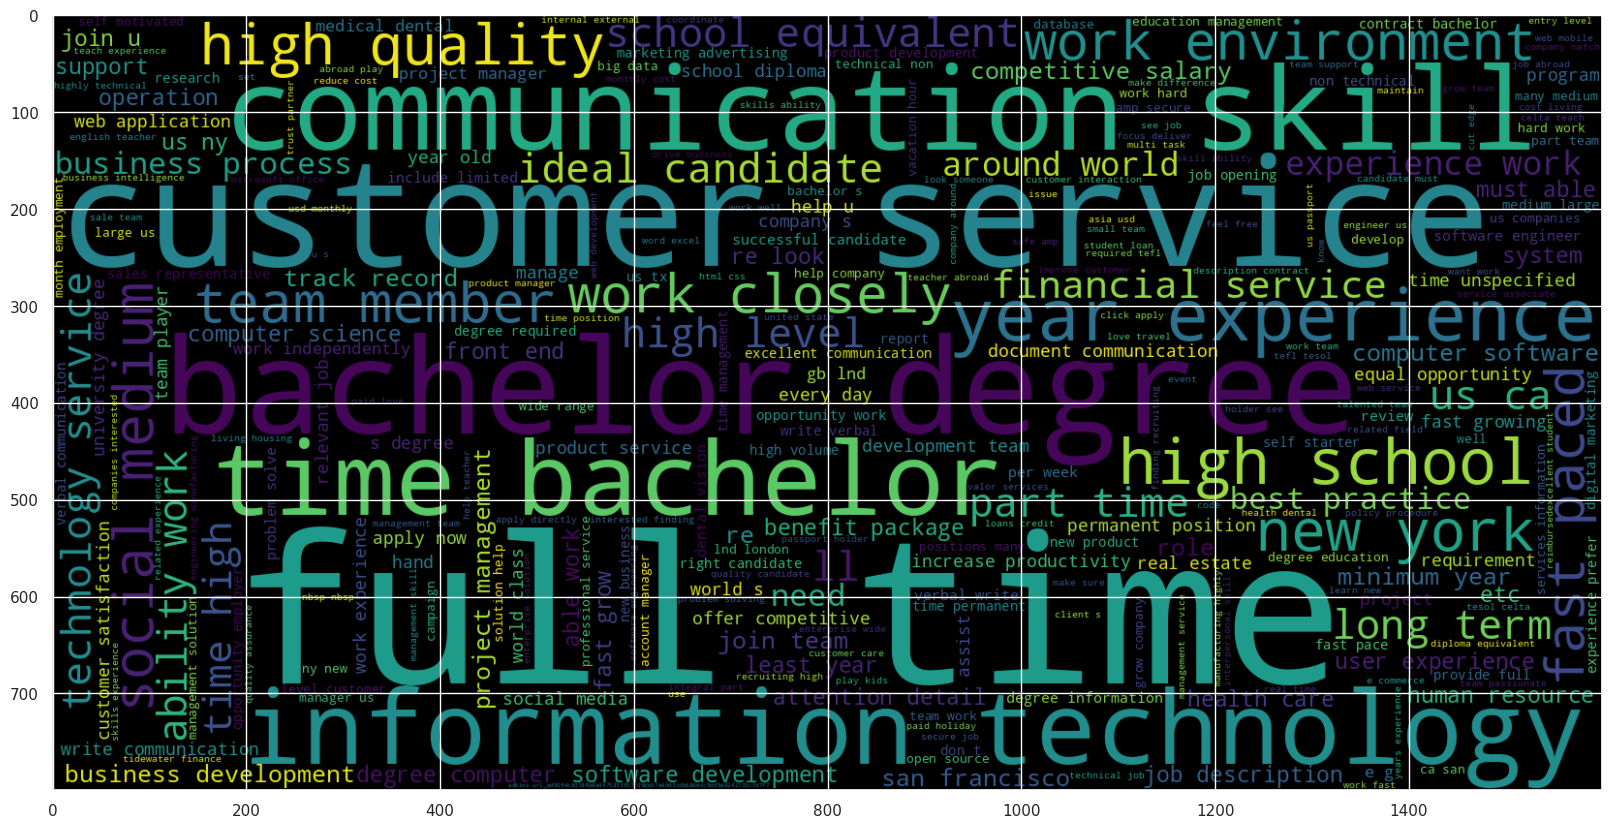

In [29]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(job[job.fraudulent == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

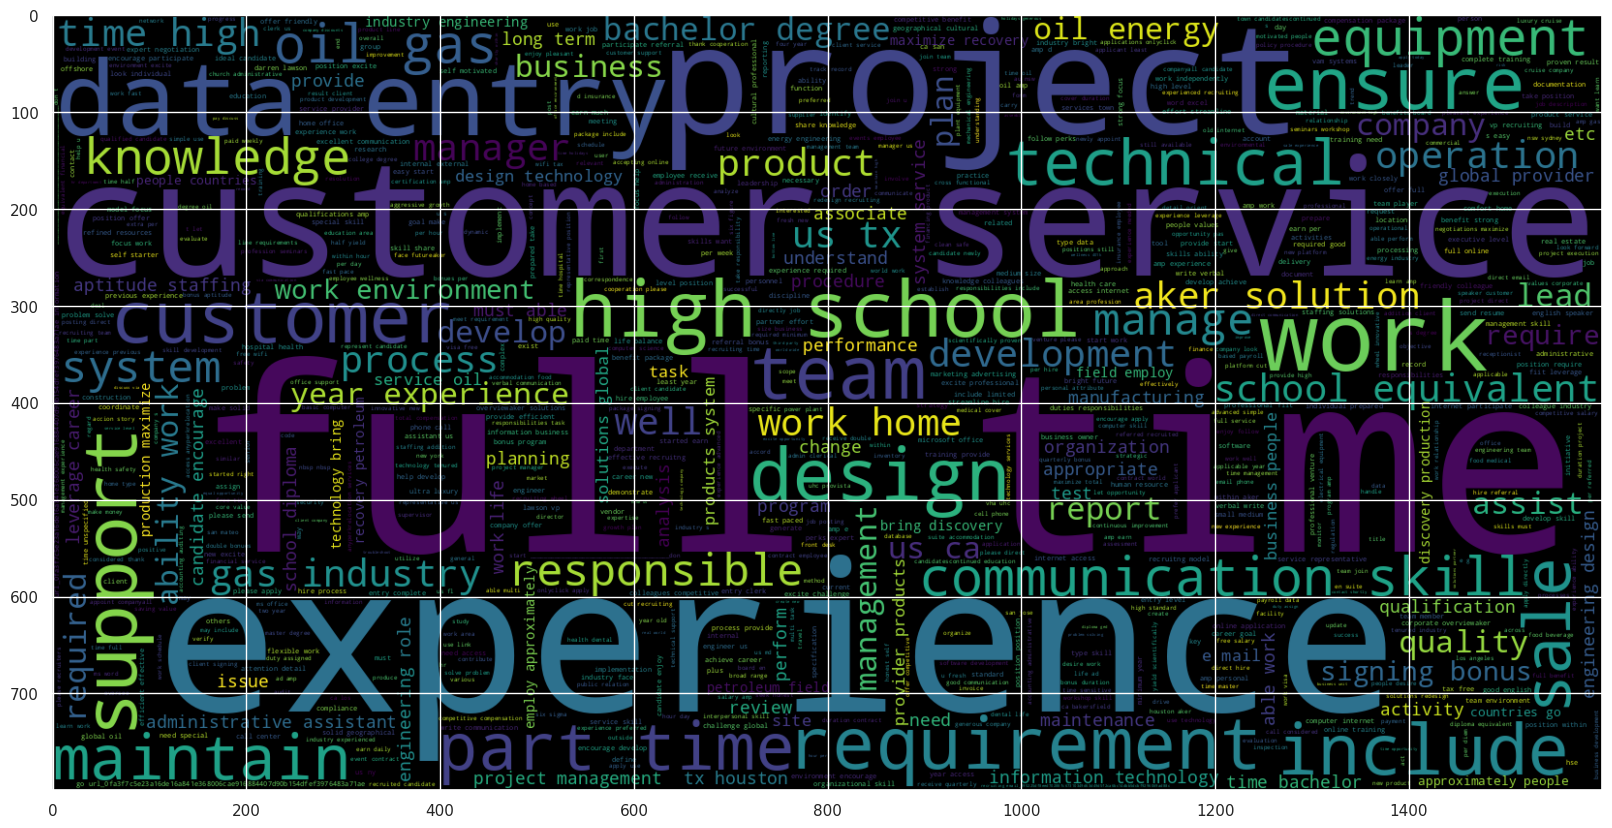

In [30]:
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(job[job.fraudulent == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [31]:
job.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"marketing intern us, ny, new york marketing fo..."
1,0,1,0,0,"customer service cloud video production nz, au..."
2,0,1,0,0,"commissioning machinery assistant (cma) us, ia..."
3,0,1,0,0,"account executive washington dc us, dc, washin..."
4,0,1,1,0,"bill review manager us, fl, fort worth spotsou..."


In [32]:
job.shape

(17880, 5)

In [33]:
# Compute length of each text in words and characters
job['word_count'] = job['text'].apply(lambda x: len(x.split()))
job['char_count'] = job['text'].apply(len)

# Find max/min length in words
max_word_length = job['word_count'].max()
min_word_length = job['word_count'].min()

# Find max/min length in characters
max_char_length = job['char_count'].max()
min_char_length = job['char_count'].min()

print(f"Max length (words): {max_word_length}")
print(f"Min length (words): {min_word_length}")
print(f"Max length (characters): {max_char_length}")
print(f"Min length (characters): {min_char_length}")

Max length (words): 1446
Min length (words): 4
Max length (characters): 12066
Min length (characters): 23


In [34]:
longest_text = job.loc[job['char_count'].idxmax(), 'text']
shortest_text = job.loc[job['char_count'].idxmin(), 'text']

print(f"Longest text: {longest_text}")
print(f"Shortest text: {shortest_text}")

Longest text: drinking water/wastewater operator us, ca, 96080 drinking water/wastewater operator (part-time) job overview apex environmental consult firm offer stable leadership growth, view employee valuable resources, reward success competitive pay benefits. seek self-motivated, part-time, dual-licensed california grade ii wastewater treatment plant operator drinking water d2/t2 operator join team shasta tehama counties become integral part continued success story. successful candidate provide routine o&amp;m private, small drinking water wastewater facility redding red bluff. responsibilities position responsibility include work independently perform routine o&amp;m duties, include limited operation control pump, blower, valve settings; collection, preservation record sample compliance permit; troubleshoot diagnostic upset treatment problem (e.g., insufficient denitrification, need supplemental carbon source, excess grease require cleaning floats, evaluation malfunction electronic 

In [35]:
del job["word_count"]
del job["char_count"]

In [36]:
# Advanced Text Cleaning Function
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions (@username) and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # 4. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # 5. Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()


    # 6. Remove stopwords
    # tokens = [word for word in text if word not in stop_words]

    # . Rejoin tokens into a single string
    cleaned_text = ' '.join(text)

    return cleaned_text

In [37]:
# Apply the cleaning function to the DataFrame
job['cleaned_text'] = job['text'].apply(clean_text)

# Output the cleaned DataFrame
print(job[['text', 'cleaned_text']])

                                                    text  \
0      marketing intern us, ny, new york marketing fo...   
1      customer service cloud video production nz, au...   
2      commissioning machinery assistant (cma) us, ia...   
3      account executive washington dc us, dc, washin...   
4      bill review manager us, fl, fort worth spotsou...   
...                                                  ...   
17875  account director distribution ca, on, toronto ...   
17876  payroll accountant us, pa, philadelphia accoun...   
17877  project cost control staff engineer cost contr...   
17878  graphic designer ng, la, lagos nemsia studios ...   
17879  web application developers nz, n, wellington e...   

                                            cleaned_text  
0      m a r k e t i n g   i n t e r n   u s   n y   ...  
1      c u s t o m e r   s e r v i c e   c l o u d   ...  
2      c o m m i s s i o n i n g   m a c h i n e r y ...  
3      a c c o u n t   e x e c u t i v e   

In [38]:
from tensorflow.keras.layers import TextVectorization

In [39]:
del job["cleaned_text"]

In [40]:
job

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"marketing intern us, ny, new york marketing fo..."
1,0,1,0,0,"customer service cloud video production nz, au..."
2,0,1,0,0,"commissioning machinery assistant (cma) us, ia..."
3,0,1,0,0,"account executive washington dc us, dc, washin..."
4,0,1,1,0,"bill review manager us, fl, fort worth spotsou..."
...,...,...,...,...,...
17875,0,1,1,0,"account director distribution ca, on, toronto ..."
17876,0,1,1,0,"payroll accountant us, pa, philadelphia accoun..."
17877,0,0,0,0,project cost control staff engineer cost contr...
17878,0,0,1,0,"graphic designer ng, la, lagos nemsia studios ..."


In [41]:
job.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"marketing intern us, ny, new york marketing fo..."
1,0,1,0,0,"customer service cloud video production nz, au..."
2,0,1,0,0,"commissioning machinery assistant (cma) us, ia..."
3,0,1,0,0,"account executive washington dc us, dc, washin..."
4,0,1,1,0,"bill review manager us, fl, fort worth spotsou..."


In [42]:
job.shape

(17880, 5)

In [43]:
del job["telecommuting"]
del job["has_company_logo"]
del job["has_questions"]

In [44]:
job

,fraudulent,text
0,0,"marketing intern us, ny, new york marketing fo..."
1,0,"customer service cloud video production nz, au..."
2,0,"commissioning machinery assistant (cma) us, ia..."
3,0,"account executive washington dc us, dc, washin..."
4,0,"bill review manager us, fl, fort worth spotsou..."
...,...,...
17875,0,"account director distribution ca, on, toronto ..."
17876,0,"payroll accountant us, pa, philadelphia accoun..."
17877,0,project cost control staff engineer cost contr...
17878,0,"graphic designer ng, la, lagos nemsia studios ..."


In [45]:
X = job["text"]
y = job["fraudulent"]

In [46]:
X.head()

,text
0,"marketing intern us, ny, new york marketing fo..."
1,"customer service cloud video production nz, au..."
2,"commissioning machinery assistant (cma) us, ia..."
3,"account executive washington dc us, dc, washin..."
4,"bill review manager us, fl, fort worth spotsou..."


In [47]:
import tensorflow as tf

In [48]:
max_features = 20000
vectorizer = TextVectorization(max_tokens = max_features,
                               output_sequence_length = 1800,
                               output_mode = "int"
)

In [49]:
vectorizer.adapt(X.values)

In [50]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('work'),
 np.str_('team'),
 np.str_('experience'),
 np.str_('customer'),
 np.str_('company'),
 np.str_('business'),
 np.str_('service'),
 np.str_('new'),
 np.str_('product'),
 np.str_('management'),
 np.str_('provide'),
 np.str_('development'),
 np.str_('technology'),
 np.str_('client'),
 np.str_('us'),
 np.str_('amp'),
 np.str_('include'),
 np.str_('year'),
 np.str_('design'),
 np.str_('marketing'),
 np.str_('fulltime'),
 np.str_('look'),
 np.str_('project'),
 np.str_('help'),
 np.str_('support'),
 np.str_('people'),
 np.str_('opportunity'),
 np.str_('degree'),
 np.str_('software'),
 np.str_('job'),
 np.str_('make'),
 np.str_('time'),
 np.str_('high'),
 np.str_('communication'),
 np.str_('use'),
 np.str_('skill'),
 np.str_('ability'),
 np.str_('data'),
 np.str_('services'),
 np.str_('sale'),
 np.str_('well'),
 np.str_('knowledge'),
 np.str_('position'),
 np.str_('need'),
 np.str_('web'),
 np.str_('lead'),
 np.str_('environment'),
 np.str_('information'),
 np.st

In [51]:
vectorized_text = vectorizer(X.values)

# *data preparation* is Done!

In [52]:
from tensorflow.keras.layers import TextVectorization

In [53]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [54]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [55]:
y.shape

(17880,)

# *Model (tensorflow)*

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# max_features = 10000  # Vocabulary size
max_len = 100         # Sequence length

model = Sequential()
# Define input_length to properly initialize model
model.add(Embedding(input_dim=max_features+1, output_dim=32, input_length=max_len))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Final output layer
model.add(Dense(1, activation='sigmoid'))

# Build the model (not strictly necessary with input_length set)
model.build(input_shape=(None, max_len))

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │         640,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 739,233 (2.82 MB)

 Trainable params: 739,233 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',  metrics=['accuracy'])

In [60]:
# random_sample = toxic.sample(n=500, random_state=42)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [63]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9615 - loss: 0.1589 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.9909 - loss: 0.0303 - val_accuracy: 0.9964 - val_loss: 0.0169
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.9949 - loss: 0.0205 - val_accuracy: 0.9980 - val_loss: 0.0067
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9964 - loss: 0.0146 - val_accuracy: 0.9989 - val_loss: 0.0040
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9972 - val_loss: 0.0080
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9989 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 7.5044e-04
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.9990 - loss: 0.003

<Figure size 800x500 with 0 Axes>

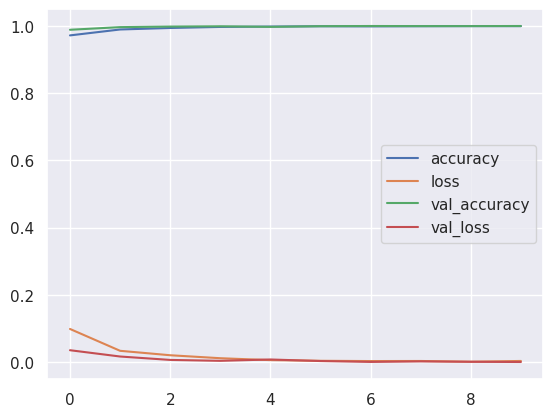

In [64]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# *Testing Model*

In [68]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [69]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━

In [70]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.989130437374115, Recall:1.0, Accuracy:0.5045045018196106


# *gradio*

In [71]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00


In [72]:
import gradio as gr

In [73]:
model.save('job.h5')

In [74]:
model = tf.keras.models.load_model('job.h5')

In [102]:
filtered_data = job.loc[job["fraudulent"] == 1]  # Select rows where fraudulent == 1

In [105]:
filtered_data

,fraudulent,text
98,1,"ic&e technician us, stocton, ca oil energy sta..."
144,1,forward cap. group raise fund purchase home so...
173,1,technician instrument controls us power plant ...
180,1,"sales executive pk, sd, karachi sales sales ex..."
215,1,"ic&e technician mt poso us, ca, bakersfield, c..."
...,...,...
17827,1,"student positions part-time full-time. us, ca,..."
17828,1,"sales associate au, nsw, sydney sales marketin..."
17829,1,"android developer pl, mz, warsaw infullmobile ..."
17830,1,"payroll clerk us, ny, new york job description..."


In [81]:
job.head()

,fraudulent,text
0,0,"marketing intern us, ny, new york marketing fo..."
1,0,"customer service cloud video production nz, au..."
2,0,"commissioning machinery assistant (cma) us, ia..."
3,0,"account executive washington dc us, dc, washin..."
4,0,"bill review manager us, fl, fort worth spotsou..."


In [106]:
job["text"][98]

'ic&e technician us, stocton, ca oil energy staffing &amp; recruiting do right oil &amp; energy industry!represented candidate automatically grant follow perks: expert negotiation behalf, maximize compensation package implimenting ongoing increase significant signing bonus refined resources (in addition potential signing bonus client company offer)1 year access anyperk: significant corporate discount cell phones, event tickets, house cleaning everything inbetween. save thousand daily expenditure professional relocation services town candidates* candidate encourage participate referral bonus program range anywhere $500 $1,000 successfully hire candidates... refer directly refined resources teamplease submit referral via online referral formthank look forward work soon! click enlarge image ic&amp;e technician bakersfield, ca mt. posoprincipal duties responsibilities: calibrates, tests, maintains, troubleshoots, installs power plant instrumentation, control system electrical equipment.per

In [89]:
import gradio as gr

def score_comment(text):
    # Vectorize input text
    vectorized_text = vectorizer([text])

    # Get prediction
    result = model.predict(vectorized_text)[0][0]  # Extract single prediction

    # Convert to readable label
    label = "Fraudulent" if result > 0.5 else "Not Fraudulent"

    return f"Prediction: {label} (Score: {result:.2f})"

# Define Gradio Interface
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Enter job description...'),
    outputs="text"
)

# Launch Gradio app
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ed32ca7d23c06f0f3b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
